### Task # 4 - To Explore Decision Tree Algorithm
#### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


In [1]:
# Load important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets as datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Class'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### The given dataset contains the data of three different species of Iris(Flowering Plants) native to North America. This dataset was outlined by Ronald Fisher in his 1936 paper 'The use of multiple measurements in taxonomic problem' as an example of linear discriminant analysis. 

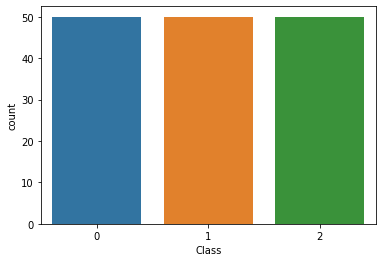

In [3]:
sns.countplot(iris_df['Class'])
plt.show()

##### In the given data all three species have equal data. Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

# Exploratory Data Analysis


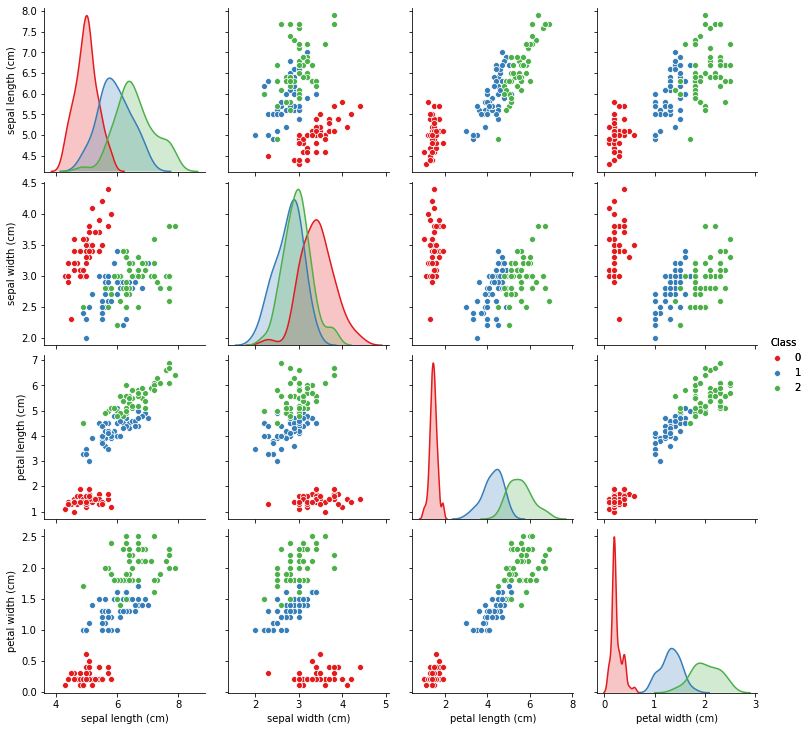

In [4]:
sns.pairplot(iris_df,hue='Class',palette='Set1').add_legend()

### Pair plot

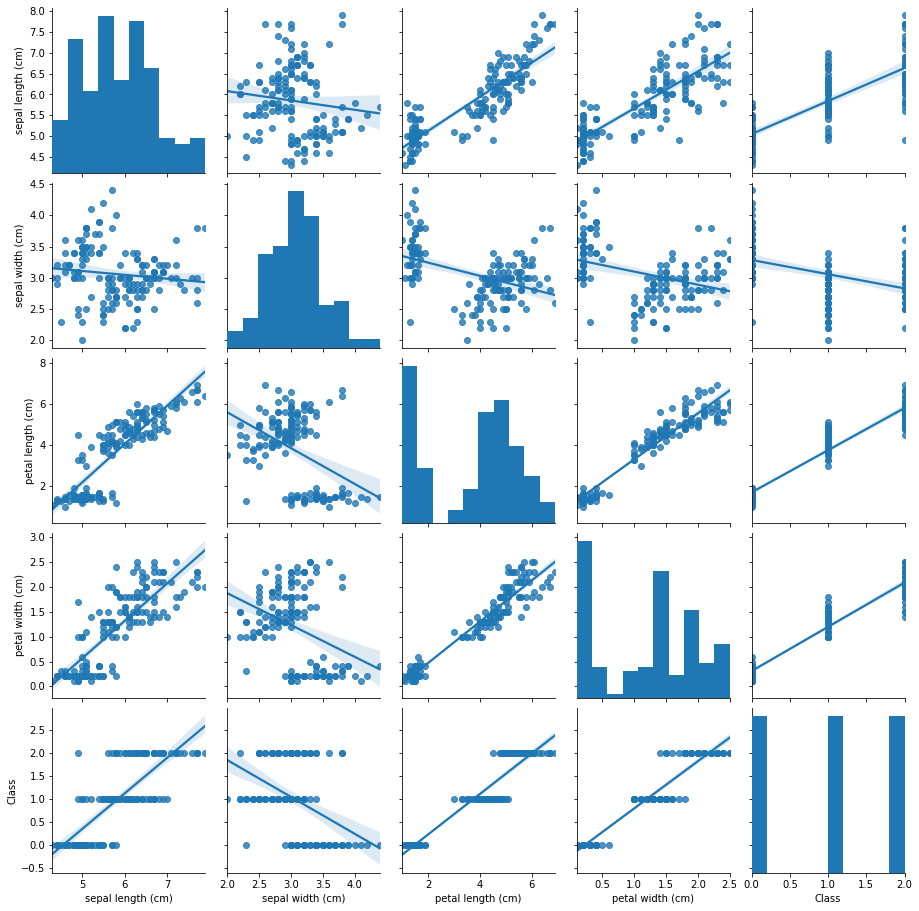

In [5]:
sns.pairplot(iris_df, kind="reg")
plt.show()

### Check Heatmap

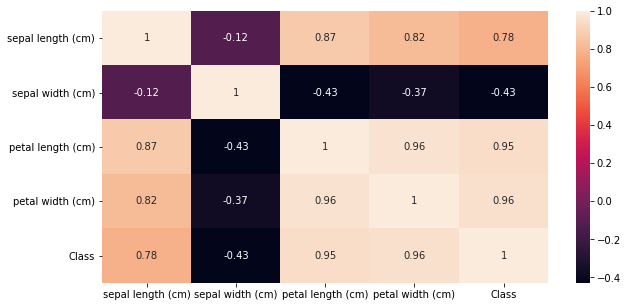

In [6]:
num_feat = iris_df.select_dtypes(include=np.number).columns
plt.figure(figsize= (10, 5))
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

##### Conclusion : Plots show that the other attributes are equally correlated to 'Class'.
##### Hence, droping other columns except for 'Class' is not required

### We'll separate the features and target from our dataset into X and y.
X contains all of the features

y contains the target

In [7]:
X = iris.data
y = iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

#### Here, I am not doing Train_Test_Split as we got only 150 rows in our iris data so we can directly build our model on entire dataset.

## Without Feature scaling
### Check Gini as criterion

In [9]:
giniDecisionTree = DecisionTreeClassifier(criterion = 'gini')

model = giniDecisionTree.fit(X, y)

#### Check Predictions and Evaluation

In [10]:
giniPred = model.predict(X)
print('Accuracy Score: ',accuracy_score(y, giniPred))

Accuracy Score:  1.0


#### Check classification_report

In [11]:
print('Classification Report')
print(classification_report(y, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Check entropy as criterion

In [12]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')
model1 = entropyDecisionTree.fit(X, y)

#### Check Predictions and Evaluation

In [13]:
entropyPred = model1.predict(X)
print('Accuracy Score: ',accuracy_score(y, entropyPred))

Accuracy Score:  1.0


#### Check classification_report

In [14]:
print('Classification Report')
print(classification_report(y, entropyPred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Final Report

**Without Feature scaling**(Full Tree)

1.**GINI Index**  Accuracy Score:  1.0

2.**Entropy**  Accuracy Score:  1.0

In [15]:
X_test = [(5.5,4.2,2.9,0.7)]
class_pred = model.predict(X_test)
print(class_pred)

[1]


In [16]:
X_test = [(5.5,4.2,2.9,0.7)]
class_pred = model1.predict(X_test)
print(class_pred)

[1]


#### As we can see without Feature Scaling we got an accuracy of 1.0 with  both criterion(Gini and Entropy). But, if we pass new data to predict the Class our 1st model (Gini criterion) predicts it as Iris-Setosa which is wrong and when we pass same data to predict class using our 2nd model (Entropy criterion) it predicts as Iris-versicolor which is correct prediction. So, our 2nd model (Entropy criterion) is the best model for Iris data.

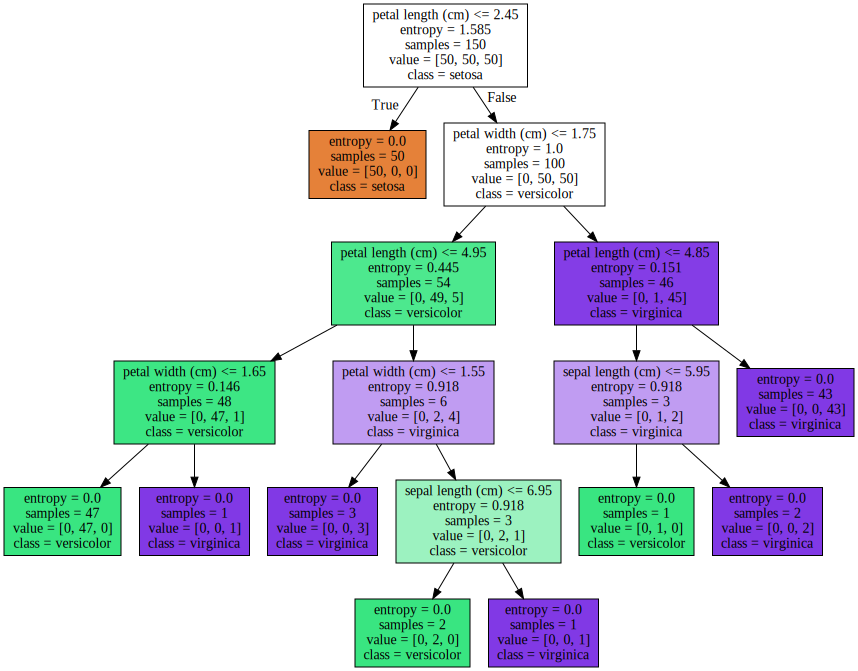

In [17]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model1, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph